# Regression Comparison

## Jorge Alberto Padilla Gutierrez

The image processing was done thanks to kapernikov guide on image classification :)

# Imports

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from collections import Counter
from skimage.io import imread
from skimage.transform import resize

# Algorithm

In [2]:
def resize_images(src, name, include, width=420, height=None):
    """
    I am trying to rezise the images to a 420p resolution
    And also store them in RGB format so I can use their variables
    """
    # height will be equal to width if not defined
    height = height if height is not None else width

    data = dict()
    data['description'] = f"resized ({width}x{height})world wonder images in rgb"
    data['label'] = []          # This will be our 'y'
    data['filename'] = []
    data['data'] = []           # This would contain our Xs

    # The pickle file is new for me, not sure if necesary
    pklname = f"{name}_{width}x{height}.pkl"

    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current = os.path.join(src, subdir)
            for file in os.listdir(current):
                if file[-3:] in {'jpg', 'png'}:      # png jpg, maybe jpeg fails?
                    try:
                        print(file)
                        image = imread(os.path.join(current, file))
                        image = resize(image, (width, height))  # is this all?
                        data['label'].append(subdir)
                        data['filename'].append(file)
                        data['data'].append(image)
                    except:
                        print(f'{file} failed, skipping')
                        pass
        joblib.dump(data,pklname)



In [3]:
# Let's test that
path = fr'{os.path.abspath(os.getcwd())}\..\data\raw'

name = "wonders"
width = 420
# Testing some dirs, not all
include = {
    'Potala Palace',
    'El Palacio de las Bellas Artes',
    'El Angel de la Independencia',
    'Alhambra',
    'Amundsen-Scott Research Station',
    'Great Pyramid of Giza',
    'Stonehenge'
}

# Uncoment this line to re-generate file
# resize_images(path, name, include, width)
# file was moved to data/processed

In [4]:
data = joblib.load(fr'{os.path.abspath(os.getcwd())}\..\data\processed\wonders_420x420.pkl')

print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Shape: ', data['data'][0].shape)
print('Labels:', np.unique(data['label']))
 
Counter(data['label'])

Samples:  668
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (420x420)world wonder images in rgb
Shape:  (420, 420, 3)
Labels: ['Alhambra' 'Amundsen-Scott Research Station'
 'El Angel de la Independencia' 'El Palacio de las Bellas Artes'
 'Great Pyramid of Giza' 'Potala Palace' 'Stonehenge']


Counter({'Potala Palace': 101,
         'Great Pyramid of Giza': 98,
         'Amundsen-Scott Research Station': 95,
         'Alhambra': 94,
         'El Angel de la Independencia': 94,
         'El Palacio de las Bellas Artes': 94,
         'Stonehenge': 92})

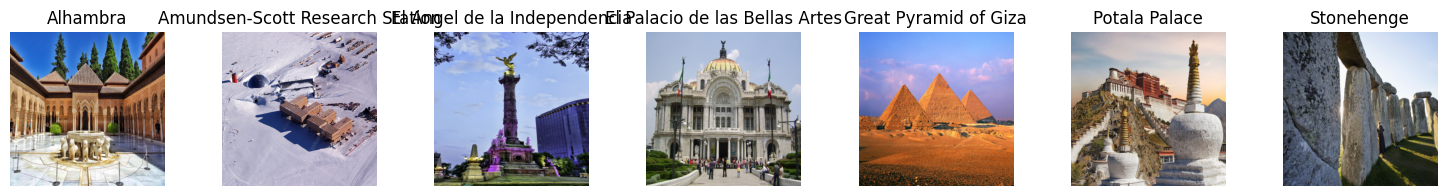

In [5]:
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

Up to this point I will no longer use the guide of Kapernikov :)

# Homework

In [69]:
# Choose two variables within your Project
# d1 = len(data['data'])
# d2 = len(data['data'][0])
# d3 = len(data['data'][0][0])
# d4 = len(data['data'][0][0][0])

#X_r = [[[[data['data'][i][j][k][0]] for k in range(d3)] for j in range(d2)] for i in range(d1)]
#X_g = [[[[data['data'][i][j][k][1]] for k in range(d3)] for j in range(d2)] for i in range(d1)]
#X_b = [[[[data['data'][i][j][k][2]] for k in range(d3)] for j in range(d2)] for i in range(d1)]

# X_r = np.array(X_r)
# X_g = np.array(X_g)
# X_b = np.array(X_b)

X = np.empty(len(data['data']), dtype=object)
for i in range(len(data['data'])):
    X[i] = np.array(data['data'][i])
y = np.array(data['label'])

#print(X_r.shape)
#print(X_g.shape)
#print(X_b.shape)
print(X)
print(y)

[array([[[0.10237231, 0.35212849, 0.73436193],
         [0.10379855, 0.35606167, 0.74064785],
         [0.10751074, 0.36858333, 0.75565225],
         ...,
         [0.44245972, 0.28723535, 0.1713734 ],
         [0.7748244 , 0.59312794, 0.41041943],
         [0.81192067, 0.61063497, 0.43662772]],

        [[0.10128992, 0.35368944, 0.73612293],
         [0.11013413, 0.36027992, 0.74759729],
         [0.11275721, 0.36626768, 0.75764662],
         ...,
         [0.37173121, 0.22029329, 0.13274519],
         [0.74079169, 0.55751822, 0.38469759],
         [0.81857225, 0.62760783, 0.44606883]],

        [[0.10901299, 0.36130674, 0.74516008],
         [0.11494482, 0.36710035, 0.75624911],
         [0.11650633, 0.37272762, 0.76089656],
         ...,
         [0.29278748, 0.15688835, 0.08570399],
         [0.73205661, 0.54786489, 0.37890081],
         [0.81571637, 0.62494732, 0.4428252 ]],

        ...,

        [[0.7043025 , 0.7909379 , 0.84209052],
         [0.73338873, 0.8200421 , 0.871246  ]

In [88]:
X = np.empty(len(data['data']), dtype=object)
X
for i in range(len(data['data'])):
    try:
        if(len(data['data'][i][0][0]) > 3):
            #print(f'{i} {X[i].shape}')
            data['data'][i] = data['data'][i][:,:,:3]
        elif(len(data['data'][i][0][0]) < 3):
            #print(f'{i} {X[i].shape}')
            pass
        X[i] = np.array(data['data'][i])
    except:
        pas

print(X.shape)
print(X[0].shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

TypeError: object of type 'numpy.float64' has no len()

In [77]:
len(data['data'][0][0][0])

3